## Importing dataset

In [1]:
import pandas as pd
# Import all 3 separate files
aligned = pd.read_csv(r"C:\Users\Anna Luiza\Documents\Swarm Behavior Data\Aligned.csv")
flocking = pd.read_csv(r"C:\Users\Anna Luiza\Documents\Swarm Behavior Data\Flocking.csv")
grouped = pd.read_csv(r"C:\Users\Anna Luiza\Documents\Swarm Behavior Data\Grouped.csv")

C:\Users\Anna Luiza\AppData\Local\Temp\ipykernel_6156\455377173.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  flocking = pd.read_csv(r"C:\Users\Anna Luiza\Documents\Swarm Behavior Data\Flocking.csv")


In [2]:
# Concatenate the dataframes into a single dataframe
df = pd.concat([aligned, flocking, grouped])

# Reset the index of the concatenated dataframe
df = df.reset_index(drop=True)

In [3]:
# Drop last column
df = df.iloc[:,:-1]

In [4]:
# Drop first column
df.drop(['x1'], axis=1, inplace=True)

In [5]:
df.dtypes

y1        float64
xVel1     float64
yVel1     float64
xA1       float64
yA1       float64
           ...   
xC200     float64
yC200     float64
nAC200      int64
nS200       int64
Class     float64
Length: 2400, dtype: object

In [6]:
# Find columns of type 'object' to treat
s = df.select_dtypes(include='object').columns
print(s)

Index([], dtype='object')


In [8]:
# Substitute all NaN with the mean of the column
df.fillna(df.mean(), inplace=True)

In [9]:
# Change all columns to datatype float
df = df.astype('float64')

# Change Class column to int
df['Class'] = df['Class'].astype('int64')

df.dtypes

y1        float64
xVel1     float64
yVel1     float64
xA1       float64
yA1       float64
           ...   
xC200     float64
yC200     float64
nAC200    float64
nS200     float64
Class       int64
Length: 2400, dtype: object

In [10]:
df.head()

,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,nAC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Class
0,-535.22,-17.88,-7.23,0.00,0.0,0.00,0.00,0.00,0.00,23.0,...,-16.85,0.0,0.00,0.0,0.0,0.00,0.00,29.0,0.0,0
1,597.54,-13.55,-5.48,0.00,0.0,0.00,0.00,0.00,0.00,25.0,...,-12.09,0.0,0.00,0.0,0.0,0.00,0.00,44.0,0.0,0
2,70.72,-14.37,-5.81,0.00,0.0,0.00,0.00,0.00,0.00,26.0,...,-16.20,0.0,0.00,0.0,0.0,0.00,0.00,40.0,0.0,0
3,-759.80,-7.59,-1.27,-0.98,-0.2,0.00,0.00,0.91,0.41,2.0,...,2.99,-1.0,-0.07,0.0,0.0,-0.52,0.86,3.0,0.0,1
4,698.39,-16.54,-6.95,-1.00,0.0,-944.07,-396.62,0.00,0.00,3.0,...,-12.61,0.0,-1.00,0.0,0.0,0.00,0.00,13.0,0.0,0


## Training model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# Divide dataset into train and test samples
y = df.Class
X = df.drop('Class', axis=1)
train_ratio = 0.7
test_ratio = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=1)

In [13]:
# Define parameters dict to train the model
knn_params = {
    'n_neighbors':[2, 5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree'] 
}

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)

In [15]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## Measuring performance

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

<AxesSubplot: >

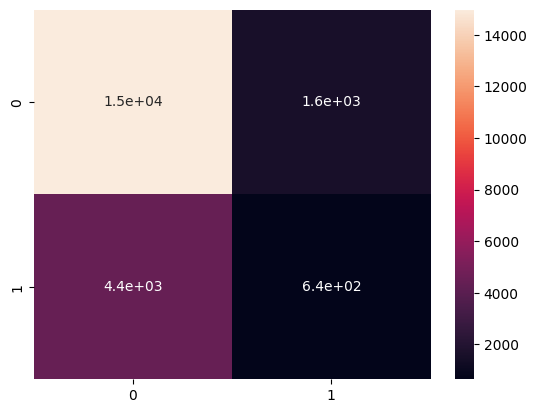

In [18]:
import seaborn as sns
cm_knn = confusion_matrix(y_test, knn_classifier.predict(X_test))
sns.heatmap(cm_knn, annot=True)

In [19]:
print(accuracy_score(y_test, knn_classifier.predict(X_test)))

0.7224149895905622


In [20]:
print(precision_score(y_test, knn_classifier.predict(X_test)))

0.287567084078712


In [21]:
print(f1_score(y_test, knn_classifier.predict(X_test)))

0.17650288223991217
